To create our embeddings, we’ll first use an embeddings layer, called `tf.keras.layers.Embedding`. This takes three arguments: the size of the tokenized vocabulary, the number of embedding dimensions to use, as well as the input length. The output of this layer needs to be reshaped to work with any fully-connected layers. Thus, `Flatten` or `GlobalAveragePooling1D` function is used.

# **Import libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd

# **Read and split dataset**

In [2]:
dataset = pd.read_csv('combined_data.csv')

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [3]:
dataset

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1
...,...,...,...
1987,1987,I think food should have flavor and texture an...,0
1988,1988,Appetite instantly gone.,0
1989,1989,Overall I was not impressed and would not go b...,0
1990,1990,The whole experience was underwhelming and I t...,0


In [4]:
training_sentences

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case Excellent value.',
 'Great for the jawbone.',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
 'The mic is great.',
 'I have to jiggle the plug to get it to line up right to get decent volume.',
 'If you have several dozen or several hundred contacts then imagine the fun of sending each of them one by one.',
 'If you are Razr owner...you must have this!',
 'Needless to say I wasted my money.',
 'What a waste of money and time!.',
 'And the sound quality is great.',
 'He was very impressed when going from the original battery to the extended battery.',
 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.',
 'Very good quality though',
 'The design is very odd as the ear "clip" is not very comfortable at all.',
 'Highly recommend for any one who has a blue tooth phone.',
 'I advise EVERYONE D

In [5]:
training_labels_final

array([0, 1, 1, ..., 1, 0, 1])

# **Tokenize**

In [6]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Create model
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Create sequences for the train data and padding
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

# Create sequences for the train data and padding
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [7]:
print(padded.shape)
print(padded)

(1593, 100)
[[ 26  68   7 ...   0   0   0]
 [ 20  90  76 ...   0   0   0]
 [ 19  13   2 ...   0   0   0]
 ...
 [  4  50 809 ...   0   0   0]
 [ 14  20  13 ...   0   0   0]
 [  4   1   5 ...   0   0   0]]


In [8]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{1: '<OOV>',
 2: 'the',
 3: 'and',
 4: 'i',
 5: 'it',
 6: 'a',
 7: 'is',
 8: 'to',
 9: 'this',
 10: 'was',
 11: 'of',
 12: 'my',
 13: 'for',
 14: 'not',
 15: 'phone',
 16: 'in',
 17: 'very',
 18: 'with',
 19: 'great',
 20: 'good',
 21: 'on',
 22: 'that',
 23: 'have',
 24: 'you',
 25: 'had',
 26: 'so',
 27: 'but',
 28: 'are',
 29: 'food',
 30: 'service',
 31: 'be',
 32: 'as',
 33: 'place',
 34: 'all',
 35: 'like',
 36: 'quality',
 37: 'time',
 38: 'product',
 39: 'one',
 40: 'at',
 41: 'we',
 42: 'well',
 43: 'they',
 44: 'would',
 45: 'back',
 46: 'if',
 47: 'headset',
 48: 'works',
 49: 'battery',
 50: 'really',
 51: "don't",
 52: 'sound',
 53: 'your',
 54: 'use',
 55: 'best',
 56: 'up',
 57: 'from',
 58: 'has',
 59: 'just',
 60: 'an',
 61: "i've",
 62: 'will',
 63: 'no',
 64: 'were',
 65: 'only',
 66: 'also',
 67: 'me',
 68: 'there',
 69: 'ever',
 70: 'than',
 71: "it's",
 72: 'out',
 73: 'nice',
 74: 'ear',
 75: 'go',
 76: 'excellent',
 77: 'when',
 78: 'first',
 79: 'work',
 80: 'r

In [9]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[5]))
print(len(decode_review(padded[5])))
print(training_sentences[5])

i have to <OOV> the plug to get it to line up right to get decent volume ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
238
I have to jiggle the plug to get it to line up right to get decent volume.


# **Train model**

In [10]:
# Build a basic sentiment network
# Note the embedding layer is first, 
# and the output is only 1 node as it is either 0 or 1 (negative or positive)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           16000     
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 9606      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


The TensorFlow team has suggest that the final network does not use a sigmoid activation layer when working with embeddings, especially when using just the two classes for sentiment analysis

In [11]:
num_epochs = 50
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
50/50 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.5122 - val_loss: 0.7026 - val_accuracy: 0.4110
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5229 - val_loss: 0.7045 - val_accuracy: 0.4110
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5229 - val_loss: 0.6949 - val_accuracy: 0.4110
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.5273 - val_loss: 0.6838 - val_accuracy: 0.4887
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6218 - accuracy: 0.6560 - val_loss: 0.6293 - val_accuracy: 0.7368
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4891 - accuracy: 0.8669 - val_loss: 0.5294 - val_accuracy: 0.7794
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3536 - accuracy: 0.8964 - val_loss: 0.4809 - val_accuracy: 0.7920
Epoch 8/50
50/50 [==

# **visualizing the network**

In [12]:
import io

# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [13]:
# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

We can visualizing the network "sees" the sentiment related to each word. Head to http://projector.tensorflow.org/ and load these files.

In [14]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# Use the model to predict a review   
other_reviews = ['The weather is good today', 
                'I have a car model bugatti', 
                'I hate negative thinking',
                'Time travel machine is very exciting invention', 
                'Happy and sad is emotional status', 
                'The Earth is third planet from the Sun',
                'It is annoying', 
                'Neutral is consider positive or not',
                'The social media connect many people but causing other problem', 
                'The natural world is amazing']
other_reviews

['The weather is good today',
 'I have a car model bugatti',
 'I hate negative thinking',
 'Time travel machine is very exciting invention',
 'Happy and sad is emotional status',
 'The Earth is third planet from the Sun',
 'It is annoying',
 'Neutral is consider positive or not',
 'The social media connect many people but causing other problem',
 'The natural world is amazing']

In [16]:
# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(other_reviews)
other_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

print(len(other_padded))

10


In [17]:
print(other_padded)

[[  2   1   7  20 466   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  4  23   6 132 946   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  4 372   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0 

In [18]:
classes = model.predict(other_padded)
print(len(classes))
classes

10


array([[9.96924698e-01],
       [1.19339876e-01],
       [1.93387154e-04],
       [8.15595865e-01],
       [9.99626160e-01],
       [1.33257836e-01],
       [4.71419364e-01],
       [5.24831284e-03],
       [2.00910404e-01],
       [9.99177039e-01]], dtype=float32)

In [19]:
# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(other_reviews)):
  print(other_reviews[x])
  print(classes[x])
  print('\n')

The weather is good today
[0.9969247]


I have a car model bugatti
[0.11933988]


I hate negative thinking
[0.00019339]


Time travel machine is very exciting invention
[0.81559587]


Happy and sad is emotional status
[0.99962616]


The Earth is third planet from the Sun
[0.13325784]


It is annoying
[0.47141936]


Neutral is consider positive or not
[0.00524831]


The social media connect many people but causing other problem
[0.2009104]


The natural world is amazing
[0.99917704]




# **Tweaking the Model**

Based on the result obtained above, it seem like the model still has a lot of improvement to be made. We can use the same model but different value for the parameter.

In [20]:
# previously is 1000
vocab_size = 500

embedding_dim = 16

# previously use 100
max_length = 50

trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),

    # previously using Flatten()
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [27]:
num_epochs = 50
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
50/50 [==============================] - 0s 4ms/step - loss: 0.1937 - accuracy: 0.9215 - val_loss: 0.5952 - val_accuracy: 0.7343
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.1918 - accuracy: 0.9222 - val_loss: 0.5646 - val_accuracy: 0.7519
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.1893 - accuracy: 0.9259 - val_loss: 0.6189 - val_accuracy: 0.7143
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1856 - accuracy: 0.9316 - val_loss: 0.5613 - val_accuracy: 0.7544
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.1856 - accuracy: 0.9247 - val_loss: 0.5756 - val_accuracy: 0.7494
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1836 - accuracy: 0.9309 - val_loss: 0.6290 - val_accuracy: 0.7068
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.1818 - accuracy: 0.9278 - val_loss: 0.6170 - val_accuracy: 0.7218
Epoch 8/50
50/50 [==

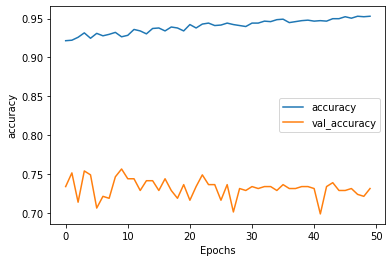

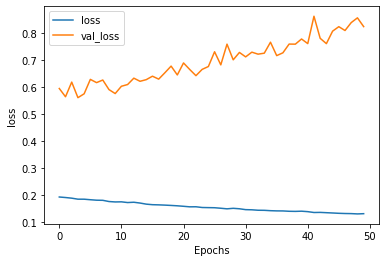

In [28]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [29]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(500, 16)


In [30]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
out_v = io.open('vecs_2.tsv', 'w', encoding='utf-8')
out_m = io.open('meta_2.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs_2.tsv')
  files.download('meta_2.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now we can check the sentiment analysis result for the same `other_reviews`.

In [31]:
other_sample_sequences = tokenizer.texts_to_sequences(other_reviews)
second_other_padded = pad_sequences(other_sample_sequences, padding=padding_type, maxlen=max_length)

new_classes = model.predict(second_other_padded)

for x in range(len(other_reviews)):
  print(other_reviews[x])
  print(new_classes[x])
  print('\n')

The weather is good today
[0.9850309]


I have a car model bugatti
[0.7767314]


I hate negative thinking
[0.00864255]


Time travel machine is very exciting invention
[0.86802965]


Happy and sad is emotional status
[0.9911617]


The Earth is third planet from the Sun
[0.47298124]


It is annoying
[0.5221584]


Neutral is consider positive or not
[0.01714928]


The social media connect many people but causing other problem
[0.01414215]


The natural world is amazing
[0.9994548]




Below is the previous analysis output.<br>
<br>
The weather is good today
[0.9969247]


I have a car model bugatti
[0.11933988]


I hate negative thinking
[0.00019339]


Time travel machine is very exciting invention
[0.81559587]


Happy and sad is emotional status
[0.99962616]


The Earth is third planet from the Sun
[0.13325784]


It is annoying
[0.47141936]


Neutral is consider positive or not
[0.00524831]


The social media connect many people but causing other problem
[0.2009104]


The natural world is amazing
[0.99917704]